**Description:**

This Python code implements a Gradient Boosting Regressor to predict permeability from conventional well logs. It uses a training dataset with train, test, and validation samples to train the model and a separate blind dataset to validate the model's performance.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import array
from numpy import mean
from numpy import std
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.io import savemat
%matplotlib inline

# Load the data

In [ ]:
df = pd.read_excel('E:/aks haye maghale/gbdtr/data.xlsx')
df_BW = pd.read_excel('E:/aks haye maghale/gbdtr/data_bw.xlsx')

In [ ]:
df_BW.head()

,CGR,NPHI,PEF,RESD,RESX,RHOB,SGR,log(NMR_PERM)
0,0.169355,0.275185,0.603290,0.358444,0.494000,0.503922,0.151025,0.624142
1,0.177758,0.279660,0.603561,0.351080,0.490961,0.496511,0.152631,0.624891
2,0.201791,0.305595,0.601401,0.336133,0.469396,0.483760,0.167486,0.610773
3,0.192143,0.322710,0.597857,0.332302,0.449326,0.479553,0.156186,0.636303
4,0.193589,0.327439,0.594776,0.336675,0.452110,0.485374,0.158116,0.657730


In [ ]:
df.head()

,CGR,NPHI,PEF,RESD,RESX,RHOB,SGR,log(NMR_PERM)
0,0.581007,0.187088,0.626319,0.356231,0.292939,0.684603,0.426369,0.144913
1,0.490225,0.128213,0.666668,0.442034,0.332189,0.719365,0.352876,0.133279
2,0.411140,0.105342,0.695993,0.436939,0.359368,0.733794,0.288896,0.198111
3,0.342359,0.101894,0.718780,0.426162,0.370579,0.733531,0.231029,0.272135
4,0.312703,0.099486,0.731391,0.446326,0.374364,0.722566,0.204826,0.291435


In [ ]:
Data = df.to_numpy()
Data_BW = df_BW.to_numpy()
print(Data.shape)
print(Data_BW.shape)

(6486, 8)
(3992, 8)


In [ ]:
X = Data[:, :-1]
y = Data[:, -1].reshape(-1, 1)

X_BW = Data_BW[:, :-1]
y_BW = Data_BW[:, -1].reshape(-1, 1)


print('X.shape = {}, y.shape = {}'.format(X.shape, y.shape))
print('X_BW.shape = {}, y_BW.shape = {}'.format(X_BW.shape, y_BW.shape))

X.shape = (6486, 7), y.shape = (6486, 1)
X_BW.shape = (3992, 7), y_BW.shape = (3992, 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=13)

In [ ]:
params = {'n_estimators': 1000,
          'max_depth': 7,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [ ]:
reg = GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)
trainOutputs = reg.predict(X_train)
testOutputs = reg.predict(X_test)
alldataOutputs = reg.predict(X)
BW = reg.predict(X_BW)
mse_test = mean_squared_error(y_test, testOutputs)
mse_train = mean_squared_error(y_train, trainOutputs)
mse_all = mean_squared_error(y, alldataOutputs)
mse_BW = mean_squared_error(y_BW, BW)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse_test))
print("The mean squared error (MSE) on train set: {:.4f}".format(mse_train))
print("The mean squared error (MSE) on all set: {:.4f}".format(mse_all))
print("The mean squared error (MSE) on Blind Well set: {:.4f}".format(mse_BW))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


The mean squared error (MSE) on test set: 0.0061
The mean squared error (MSE) on train set: 0.0015
The mean squared error (MSE) on all set: 0.0029
The mean squared error (MSE) on Blind Well set: 0.0087


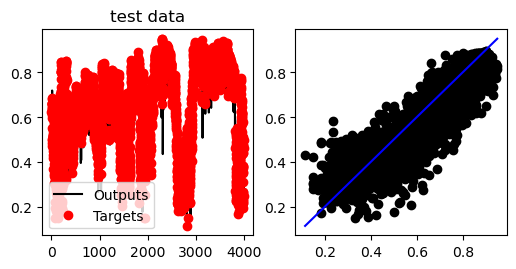

In [ ]:
plt.figure(figsize = (6,6) , dpi = 100)
plt.subplot(2,2,1)
plt.plot(BW , 'k' , label='Outputs')
plt.plot(y_BW , 'ro' , label='Targets')
plt.legend()
plt.title('test data')

plt.subplot(2,2,2)
plt.plot(y_BW,BW,'ko')
xmin = np.min([np.min(y_BW) , np.min(BW)])
xmax = np.max([np.max(y_BW) , np.max(BW)])
plt.plot([xmin , xmax] , [xmin , xmax] , 'b')

In [ ]:
mdic = {'t_BW':y_BW}
savemat("matlab_matrix_1.mat", mdic)

In [ ]:
mdic = {'y_BW':BW}
savemat("matlab_matrix_2.mat", mdic)

In [ ]:
mdic = {'y':alldataOutputs}
savemat("matlab_matrix_3.mat", mdic)

In [ ]:
mdic = {'t':y}
savemat("matlab_matrix_4.mat", mdic)

In [ ]:
mdic = {'train_output':trainOutputs}
savemat("matlab_matrix_5.mat", mdic)

In [ ]:
mdic = {'train_target':y_train}
savemat("matlab_matrix_6.mat", mdic)

In [ ]:
mdic = {'test_output':testOutputs}
savemat("matlab_matrix_7.mat", mdic)

In [ ]:
mdic = {'test_target':y_test}
savemat("matlab_matrix_8.mat", mdic)